In [1]:
import pandas as pd
import numpy as np

In [2]:
kospi_200_items = pd.read_excel('./data/cate_scale_fiscal_rate.xlsx')

In [3]:
for i in kospi_200_items.columns:
    print( i ,'  ', kospi_200_items[i].isna().sum())

부채비율(%)    0
매출액증가율(전년동기)(%)    0
매출총이익증가율(전년동기)(%)    0
매출총이익증가율(전분기)(%)    0
영업이익증가율(전년동기)(%)    0
영업이익증가율(전분기)(%)    0
총포괄이익증가율(전년동기)(%)    0
총포괄이익증가율(전분기)(%)    0
EBITDA증가율(전년동기)(%)    0
EBITDA증가율(전분기)(%)    0
총자산증가율(전년동기)(%)    0
총자산증가율(전분기)(%)    0
EPS증가율(전년동기)(%)    0
EPS증가율(전분기)(%)    0
BPS증가율(전년동기)(%)    0
BPS증가율(전분기)(%)    0
ROA(총포괄이익)(%)    0
ROE(당기순이익)(%)    0
총자산회전율(회)    0
현금및현금성자산구성비율(%)    0
변동성 (20일)    0
거래량 (20일 평균)(주)    0
외국인보유비중(티커)(%)    0
공매도거래량 (20일)(주)    0
순매수수량(개인)(20일합산)(주)    0
순매수수량(기관계)(20일합산)(주)    0
순매수수량(외국인계)(20일합산)(주)    0
PER(IFRS-연결)    0
PBR(IFRS-연결)    0
수익률 (1개월)(%)    0
Name    0
수익률 (3개월)(%)    0


In [4]:
col = kospi_200_items.columns

In [7]:
col

Index(['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)',
       '영업이익증가율(전년동기)(%)', '영업이익증가율(전분기)(%)', '총포괄이익증가율(전년동기)(%)',
       '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)', 'EBITDA증가율(전분기)(%)',
       '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)', 'EPS증가율(전년동기)(%)',
       'EPS증가율(전분기)(%)', 'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)',
       'ROE(당기순이익)(%)', '총자산회전율(회)', '현금및현금성자산구성비율(%)', '변동성 (20일)',
       '거래량 (20일 평균)(주)', '외국인보유비중(티커)(%)', '공매도거래량 (20일)(주)',
       '순매수수량(개인)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)',
       'PER(IFRS-연결)', 'PBR(IFRS-연결)', '수익률 (1개월)(%)', 'Name', '수익률 (3개월)(%)'],
      dtype='object')

In [5]:
def data_sp(data):
    com_name_set = list(set(data.Name))
    
    ## 18년도 3,6월 이전 이후로 나누기
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-2])
        test_set = test_set.append(sub_set[-2:])
    return train_set , test_set

In [6]:
train,test = data_sp(kospi_200_items)

In [8]:
## train test를 X,Y 나누기
train_X = train[['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)',
       '영업이익증가율(전년동기)(%)', '영업이익증가율(전분기)(%)', '총포괄이익증가율(전년동기)(%)',
       '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)', 'EBITDA증가율(전분기)(%)',
       '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)', 'EPS증가율(전년동기)(%)',
       'EPS증가율(전분기)(%)', 'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)',
       'ROE(당기순이익)(%)', '총자산회전율(회)', '현금및현금성자산구성비율(%)']]

test_X = test[['부채비율(%)', '매출액증가율(전년동기)(%)', '매출총이익증가율(전년동기)(%)', '매출총이익증가율(전분기)(%)',
       '영업이익증가율(전년동기)(%)', '영업이익증가율(전분기)(%)', '총포괄이익증가율(전년동기)(%)',
       '총포괄이익증가율(전분기)(%)', 'EBITDA증가율(전년동기)(%)', 'EBITDA증가율(전분기)(%)',
       '총자산증가율(전년동기)(%)', '총자산증가율(전분기)(%)', 'EPS증가율(전년동기)(%)',
       'EPS증가율(전분기)(%)', 'BPS증가율(전년동기)(%)', 'BPS증가율(전분기)(%)', 'ROA(총포괄이익)(%)',
       'ROE(당기순이익)(%)', '총자산회전율(회)', '현금및현금성자산구성비율(%)']]

train_Y = train['수익률 (3개월)(%)']
test_Y = test['수익률 (3개월)(%)']

 Simple modeling
Cross validate models

* SVC
* Decision Tree
* AdaBoost 
* Random Forest
* Extra Trees
* Gradient Boosting
* Multiple layer perceprton (neural network)
* KNN
* Logistic regression
* Linear Discriminant Analysis

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
import matplotlib.pyplot as plt

### Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.6222222222222222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### K-Nearest Neighbours(KNN)

In [16]:
model=KNeighborsClassifier(n_neighbors=7) 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.5888888888888889


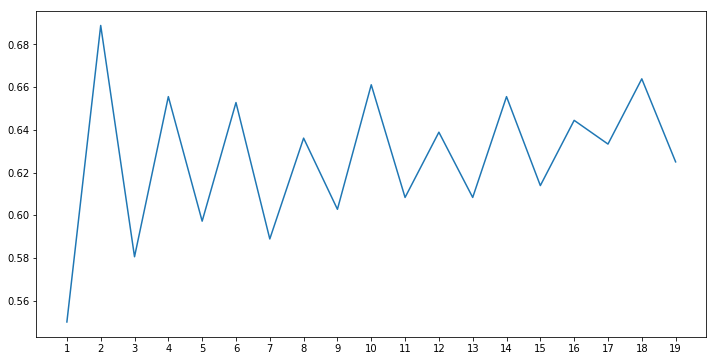

Accuracies for different values of n are: [0.55       0.68888889 0.58055556 0.65555556 0.59722222 0.65277778
 0.58888889 0.63611111 0.60277778 0.66111111 0.60833333 0.63888889
 0.60833333 0.65555556 0.61388889 0.64444444 0.63333333 0.66388889
 0.625     ] with the max value as  0.6888888888888889


In [17]:
a_index=list(range(1,20))
a = pd.Series()
x = a_index
for i in list(range(1,20)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [18]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.5527777777777778


### Random Forests

In [19]:
model=RandomForestClassifier(n_estimators=3000)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))


The accuracy of the Random Forests is 0.6


In [20]:
# for i in list(range(len(col)-2))[1:]:
#     model=RandomForestClassifier(n_estimators=3000, max_depth=i)
#     model.fit(train_X,train_Y)
#     prediction7=model.predict(test_X)
#     print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

asdasdasdsad

In [21]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]

classifiers=['Logistic Regression','KNN','Naive Bayes','Random Forest']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=14),GaussianNB(),RandomForestClassifier(n_estimators=3000,max_depth = 6 )]
for i in models:
    model = i
    cv_result = cross_val_score(model,train_X,train_Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

,CV Mean,Std
Logistic Regression,0.549106,0.028432
KNN,0.524941,0.034482
Naive Bayes,0.539966,0.026762
Random Forest,0.555008,0.031704


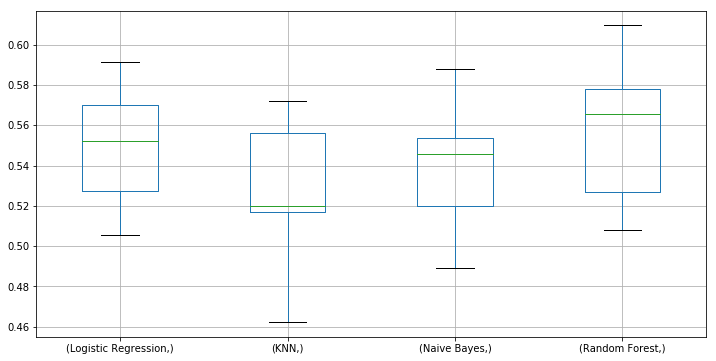

In [22]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

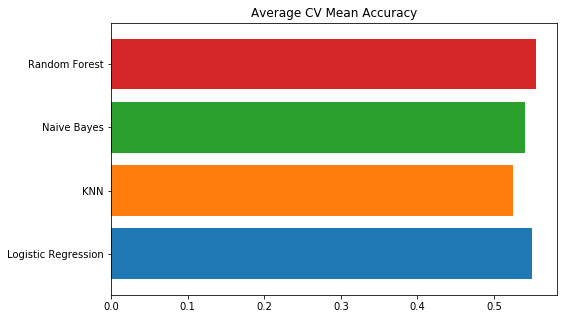

In [23]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [24]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('LR',LogisticRegression(C=0.05)),
                                              ('RFor',RandomForestClassifier(n_estimators=2000,random_state=0)),
                                              ('KNN',KNeighborsClassifier(n_neighbors=14)),
                                              ('GNB', GaussianNB())
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,train_X,train_Y, cv = 10 ,scoring = "accuracy")
print('The cross validated score is',cross.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy for ensembled model is: 0.6055555555555555


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The cross validated score is 0.547528171607868
